# MANUALY CLASSIFY THE DATA TRIALS

## LIBRARIES

In [357]:
import json
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## IMPORT DATASET

In [406]:
with open('../Control/data_pos_trial_hexagon.json') as f:
    full_data_dict = json.load(f)

#poses_drf = [60,65,70]
pose = 70
#finger_gaps = [34,42,50]
gap = 50
#sqrt_sides = [20,25,30]
dim = 30
#imgs = [1,2]
img = 2
data_list=[[],[]]
                
dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+"_"+str(img)
data_dict = full_data_dict[dict_key]
data_list = [data_dict['LF_motion1'][0][6:],data_dict['RF_motion1'][0][6:]]
time_list = [data_dict['LF_motion1'][1][6:],data_dict['RF_motion1'][1][6:]]
data_array = np.array(data_list).T
angle_array = data_array
time_array = np.array(time_list).T

## CLASSIFICATION

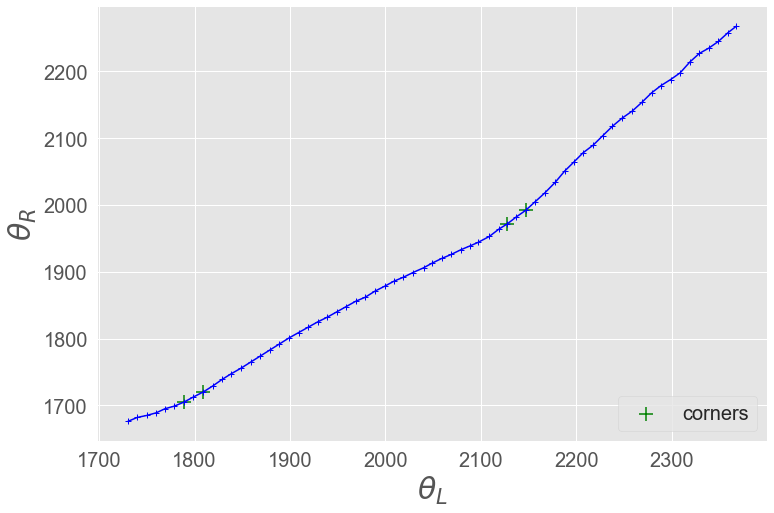

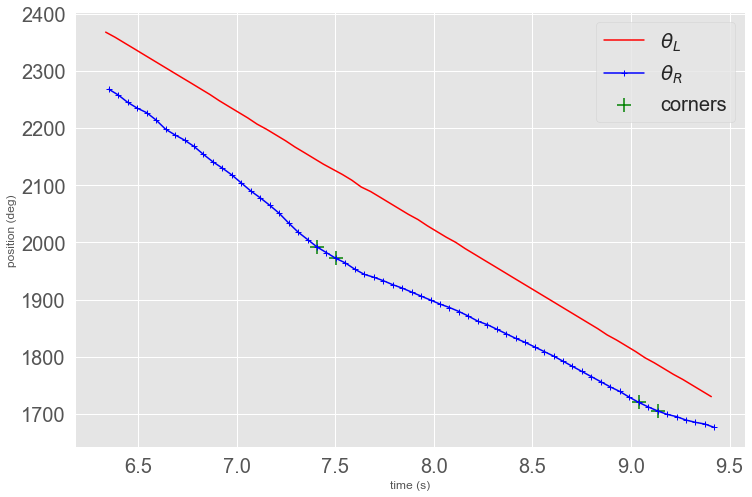

In [407]:
index_corner = 56
second_index_corner = index_corner+2
third_index_corner = 22
fourth_index_corner = third_index_corner+2
"""fifth_index_corner = 4
sixth_index_corner = fifth_index_corner+2"""

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(angle_array.T[0], angle_array.T[1], 
            color='blue',marker='+')
plt.scatter(angle_array.T[0][index_corner], 
            angle_array.T[1][index_corner], color='green',
            s=200 ,marker='+', label='corners')
plt.scatter(angle_array.T[0][second_index_corner], 
            angle_array.T[1][second_index_corner], color='green',
            s=200 ,marker='+')
plt.scatter(angle_array.T[0][third_index_corner], 
            angle_array.T[1][third_index_corner], color='green',
            s=200 ,marker='+')
plt.scatter(angle_array.T[0][fourth_index_corner], 
            angle_array.T[1][fourth_index_corner], color='green',
            s=200 ,marker='+')
"""plt.scatter(angle_array.T[0][fifth_index_corner], 
            angle_array.T[1][fifth_index_corner], color='green',
            s=200 ,marker='+')
plt.scatter(angle_array.T[0][sixth_index_corner], 
            angle_array.T[1][sixth_index_corner], color='green',
            s=200 ,marker='+')"""
plt.ylabel(r'$\theta_R$')
plt.xlabel(r'$\theta_L$')
plt.legend(loc='lower right')
plt.savefig("manual_corner_id_hexagon"+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(img)+'.png')

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time_array.T[0],angle_array.T[0], color='red', label=r'$\theta_L$')
plt.plot(time_array.T[1], angle_array.T[1], color='blue',marker='+', label=r'$\theta_R$')
plt.scatter(time_array.T[1][index_corner], 
            angle_array.T[1][index_corner], color='green',s=200 ,marker='+', label='corners')
plt.scatter(time_array.T[1][second_index_corner], 
            angle_array.T[1][second_index_corner], color='green',s=200 ,marker='+')
plt.scatter(time_array.T[1][third_index_corner], 
            angle_array.T[1][third_index_corner], color='green',s=200 ,marker='+')
plt.scatter(time_array.T[1][fourth_index_corner], 
            angle_array.T[1][fourth_index_corner], color='green',s=200 ,marker='+')
plt.ylabel('position (deg)')
plt.xlabel('time (s)')
plt.legend(loc='upper right')
plt.savefig("corner_id_time series_hexagon"+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(img)+'.png')

Text(0.5, 1.0, 'manual_classification_sqrt_30x30_pose_70_gap_50_2')

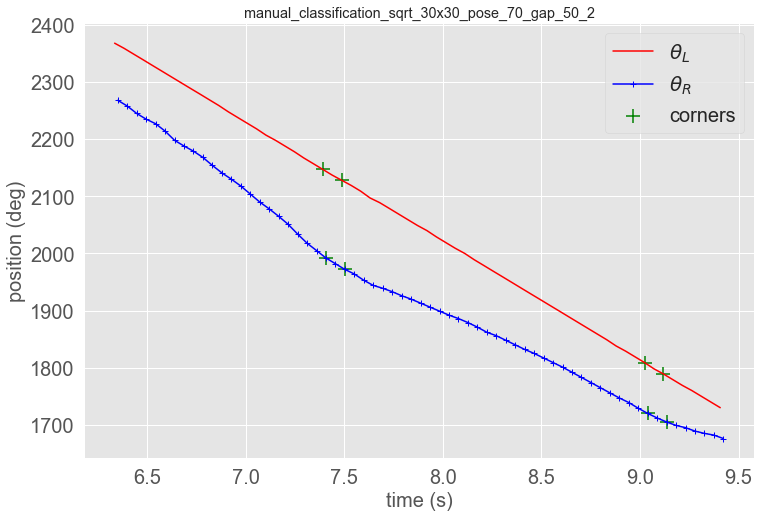

In [408]:
data_pos_L = []
data_pos_R = []
for i in range(len(data_list[0])):
    if (i == index_corner) or (i == second_index_corner) or (i == third_index_corner) or (i == fourth_index_corner):
    #if (i == index_corner) or (i == second_index_corner) or (i == third_index_corner) or (i == fourth_index_corner) or (i == fifth_index_corner) or (i == sixth_index_corner):
    #if (i == third_index_corner) or (i == fourth_index_corner):

        # LEFT FINGER
        data_pos_L += [[float(angle_array.T[0][i]),time_array.T[0][i],'corner']]
        data_pos_R += [[float(angle_array.T[1][i]),time_array.T[1][i],'corner']]
    else:
        data_pos_L += [[float(angle_array.T[0][i]),time_array.T[0][i],'side']]
        data_pos_R += [[float(angle_array.T[1][i]),time_array.T[1][i],'side']]

array_pos_L = np.array(data_pos_L)
array_pos_R = np.array(data_pos_R)
### replot to be sure ###

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time_array.T[0], angle_array.T[0], color='red', label=r'$\theta_L$')
plt.plot(time_array.T[1], angle_array.T[1], color='blue',marker='+', label=r'$\theta_R$')
plt.scatter(time_array.T[1][array_pos_R.T[2] == 'corner'], 
            angle_array.T[1][array_pos_R.T[2] == 'corner'], 
            color='green',s=200 ,marker='+', label='corners')
plt.scatter(time_array.T[0][array_pos_L.T[2] == 'corner'], 
            angle_array.T[0][array_pos_L.T[2] == 'corner'], 
            color='green',s=200 ,marker='+')
plt.ylabel('position (deg)')
plt.xlabel('time (s)')
plt.legend(loc='upper right')
plt.title("manual_classification_sqrt_"+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(img))
#plt.savefig("manual_classification_sqrt_"+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(img)+'.png'))

## Add to json file

In [409]:
# STORE DATA
## INITIALIZE THE JSON FILE !!!!!!!!!

# STORE THE DATA  INTO A JSON FILE
all_trial_data = {}
dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+"_"+str(img)

data_pos_trial = {
    "LF_motion1": data_pos_L,
    "RF_motion1": data_pos_R,
}

all_trial_data[dict_key] = data_pos_trial

#with open("data_hexagon_trial_classified.json", 'w') as f:
#    indent = 2  # is not needed but makes the file human-readable
#    json.dump(all_trial_data, f, indent=2)

## ADD TO THE JSON FILE

with open("data_hexagon_trial_classified.json", 'r+') as f:
   # indent=2 is not needed but makes the file human-readable
    data_pos_final = json.load(f)
    data_pos_final.update(all_trial_data)
    f.seek(0)
    json.dump(data_pos_final, f, indent=2)
